CONTENT-BASED RECOMENDATION SYSTEM USING BOW AND TF_IDF MODELS

In [3]:
import warnings
import requests
from Utils import *
import pandas as pd
from collections import Counter
from DataPreprocessing import Data_Preprocessing
from TextPreprocessing import TextPreprocessing
from BagOfWordsModel import BagOfWordsModel
from TFIDFModel import TFIDFModel

In [4]:
def Get_And_Visualize_Data():
    data_set = pd.read_json('tops_fashion.json')
    print(" No. of Products (or data points) : ",data_set.shape[0],"\n No. of features: ",data_set.shape[1])
    print(data_set.columns) # total features 
    # Features we are gonna use :
    # brand,color,product_type_name,medium image url,title,formatted_price
    data_set = data_set[['asin','brand','color','product_type_name','medium_image_url','title','formatted_price']]
    # ASIN - Amazon consumer API--as an associate--asin(Amazon Standard Identification No.) - ID / primary key
    return data_set

In [5]:
data_set=Get_And_Visualize_Data()

 No. of Products (or data points) :  183138 
 No. of features:  19
Index(['sku', 'asin', 'product_type_name', 'formatted_price', 'author',
       'color', 'brand', 'publisher', 'availability', 'reviews',
       'large_image_url', 'availability_type', 'small_image_url',
       'editorial_review', 'title', 'model', 'medium_image_url',
       'manufacturer', 'editorial_reivew'],
      dtype='object')


In [6]:
def ExploratoryDataAnalysis(data_set):
    data_set.head()
    for feature in data_set.columns:
        print("\n\n\nSTATISTICS FOR FEATURE : ",feature.upper())
        print("\nDescription for Feature : \n")
        print(data_set[feature].describe())
        print("\nCount/Frequency for Feature : \n")
        data_set['product_type_name'].unique()
        print(Counter(list(data_set[feature])).most_common(10))

In [7]:
ExploratoryDataAnalysis(data_set)
data_set.to_pickle('Pickles/Required_Apparel_Data')




STATISTICS FOR FEATURE :  ASIN

Description for Feature : 

count         183138
unique        183138
top       B01N3CWLZ8
freq               1
Name: asin, dtype: object

Count/Frequency for Feature : 

[('B016I2TS4W', 1), ('B01N49AI08', 1), ('B01JDPCOHO', 1), ('B01N19U5H5', 1), ('B004GSI2OS', 1), ('B00TAEHGGS', 1), ('B012YX2ZPI', 1), ('B074GPTP3J', 1), ('B06Y2LCC5S', 1), ('B00T9W4E66', 1)]



STATISTICS FOR FEATURE :  BRAND

Description for Feature : 

count     182987
unique     10577
top         Zago
freq         223
Name: brand, dtype: object

Count/Frequency for Feature : 

[('Zago', 223), ('XQS', 222), ('Yayun', 215), ('YUNY', 198), ('XiaoTianXin-women clothes', 193), ('Generic', 192), ('Boohoo', 190), ('Alion', 188), ('Abetteric', 187), ('TheMogan', 187)]



STATISTICS FOR FEATURE :  COLOR

Description for Feature : 

count     64956
unique     7380
top       Black
freq      13207
Name: color, dtype: object

Count/Frequency for Feature : 

[(None, 118182), ('Black', 13207), (

In [8]:
#data_set=Data_Preprocessing(data_set)
data_set=pd.read_pickle('Pickles/Preprocessed_Data_version2')
data_set

,asin,brand,color,product_type_name,medium_image_url,title,formatted_price
133820,B010RV33VE,xiaoming,Pink,SHIRT,https://images-na.ssl-images-amazon.com/images...,xiaoming Womens Sleeveless Loose Long T-shirts...,$18.19
81461,B01DDSDLNS,xiaoming,White,SHIRT,https://images-na.ssl-images-amazon.com/images...,xiaoming Women's White Long Sleeve Single Brea...,$21.58
75995,B00X5LYO9Y,xiaoming,Red Anchors,SHIRT,https://images-na.ssl-images-amazon.com/images...,xiaoming Stripes Tank Patch/Bear Sleeve Anchor...,$15.91
151570,B00WPJG35K,xiaoming,White,SHIRT,https://images-na.ssl-images-amazon.com/images...,xiaoming Sleeve Sheer Loose Tassel Kimono Woma...,$14.32
152506,B00WOB0LHK,xiaoming,Red+Grey,SHIRT,https://images-na.ssl-images-amazon.com/images...,xiaoming Sleeve Plaid Checked Casual Tops Shir...,$15.38
...,...,...,...,...,...,...,...
6052,B06VXNH8P5,AJ,White,SHIRT,https://images-na.ssl-images-amazon.com/images...,"""Life is a Journey"" Self-Help DIY T-Shirt (Wom...",$9.50
40451,B073SKNQHD,The Workout Princess,Premium Heather Gray,SHIRT,https://images-na.ssl-images-amazon.com/images...,"""I Workout To Burn off The Crazy"", Tri Blend T...",$24.99
109599,B00KI3VDXM,Crazy4Bling,Purple,SHIRT,https://images-na.ssl-images-amazon.com/images...,"""I Wanna Be Adored"" Long Sleeve Top with Shred...",$39.99
78827,B003IDE8XQ,Maggie's Organics,Grey,HOME,https://images-na.ssl-images-amazon.com/images...,"""Camisoles Grey - Medium Fair Labor, 1 pc""",$18.99


In [9]:
#data_set=TextPreprocessing(data_set)
data_set=pd.read_pickle('Pickles/Preprocessed_Data_version3')
data_set

,asin,brand,color,product_type_name,medium_image_url,title,formatted_price
133820,B010RV33VE,xiaoming,Pink,SHIRT,https://images-na.ssl-images-amazon.com/images...,xiaoming womens sleeveless loose long tshirts ...,$18.19
81461,B01DDSDLNS,xiaoming,White,SHIRT,https://images-na.ssl-images-amazon.com/images...,xiaoming womens white long sleeve single breas...,$21.58
75995,B00X5LYO9Y,xiaoming,Red Anchors,SHIRT,https://images-na.ssl-images-amazon.com/images...,xiaoming stripes tank patchbear sleeve anchor ...,$15.91
151570,B00WPJG35K,xiaoming,White,SHIRT,https://images-na.ssl-images-amazon.com/images...,xiaoming sleeve sheer loose tassel kimono woma...,$14.32
152506,B00WOB0LHK,xiaoming,Red+Grey,SHIRT,https://images-na.ssl-images-amazon.com/images...,xiaoming sleeve plaid checked casual tops shir...,$15.38
...,...,...,...,...,...,...,...
6052,B06VXNH8P5,AJ,White,SHIRT,https://images-na.ssl-images-amazon.com/images...,life journey selfhelp diy tshirt womenwhitefem...,$9.50
40451,B073SKNQHD,The Workout Princess,Premium Heather Gray,SHIRT,https://images-na.ssl-images-amazon.com/images...,workout burn crazy tri blend tank top funny wo...,$24.99
109599,B00KI3VDXM,Crazy4Bling,Purple,SHIRT,https://images-na.ssl-images-amazon.com/images...,wanna adored long sleeve top shredded shoulder...,$39.99
78827,B003IDE8XQ,Maggie's Organics,Grey,HOME,https://images-na.ssl-images-amazon.com/images...,camisoles grey medium fair labor 1 pc,$18.99


Enter the Apparal ID : 
12300


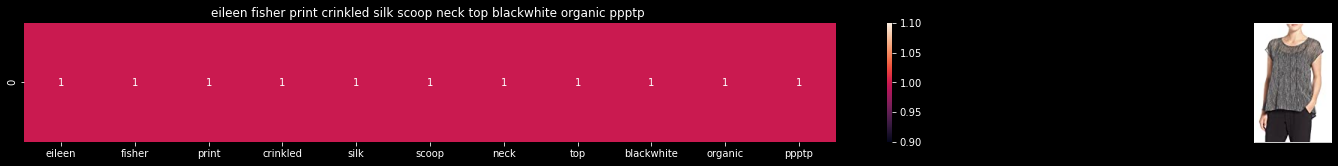

ASIN : B07562Y6M5
TITLE : eileen fisher print crinkled silk scoop neck top blackwhite organic ppptp 
BRAND : Eileen Fisher
Similarity Index(Euclidian Similarity) : 0.0
______________________________________________________________________


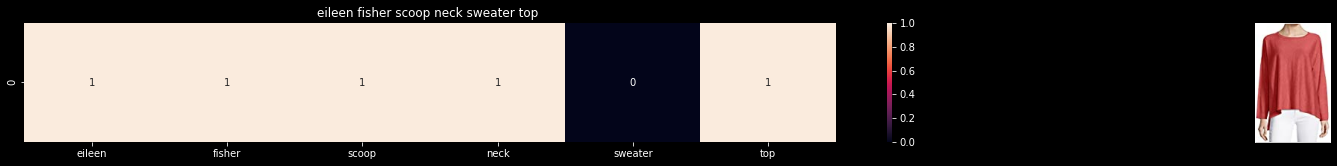

ASIN : B071PBRD93
TITLE : eileen fisher scoop neck sweater top 
BRAND : Eileen Fisher
Similarity Index(Euclidian Similarity) : 2.6457513110645907
______________________________________________________________________


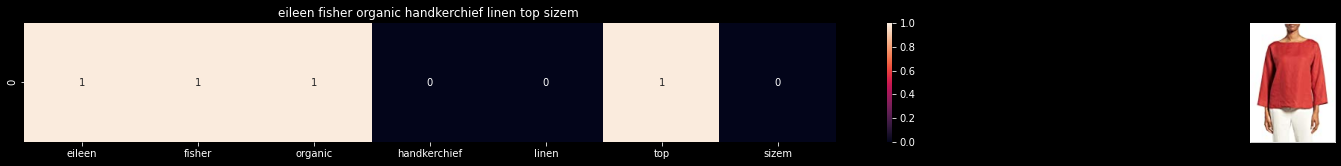

ASIN : B074TTWPHC
TITLE : eileen fisher organic handkerchief linen top sizem 
BRAND : Eileen Fisher
Similarity Index(Euclidian Similarity) : 3.1622776601683795
______________________________________________________________________


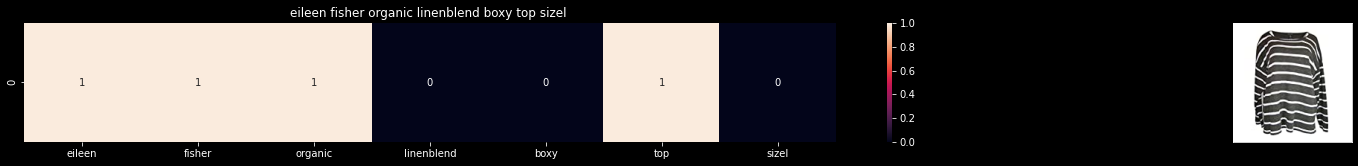

ASIN : B072FQ3PPB
TITLE : eileen fisher organic linenblend boxy top sizel 
BRAND : Eileen Fisher
Similarity Index(Euclidian Similarity) : 3.1622776601683795
______________________________________________________________________


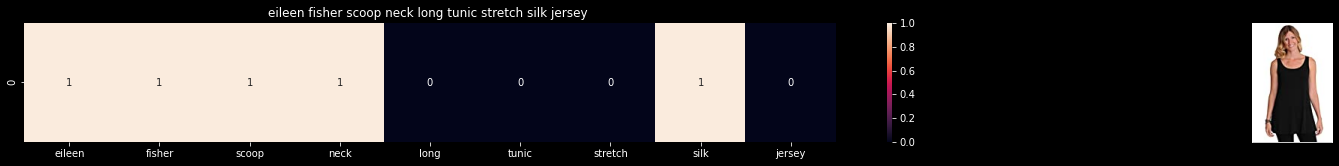

ASIN : B00W7UQLYK
TITLE : eileen fisher scoop neck long tunic stretch silk jersey 
BRAND : Eileen Fisher
Similarity Index(Euclidian Similarity) : 3.1622776601683795
______________________________________________________________________


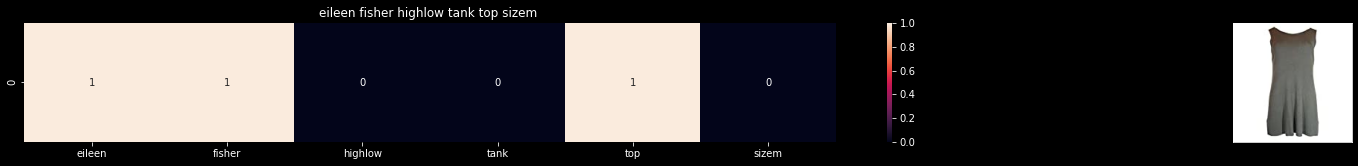

ASIN : B01N8Q2FAS
TITLE : eileen fisher highlow tank top sizem 
BRAND : Eileen Fisher
Similarity Index(Euclidian Similarity) : 3.3166247903554
______________________________________________________________________


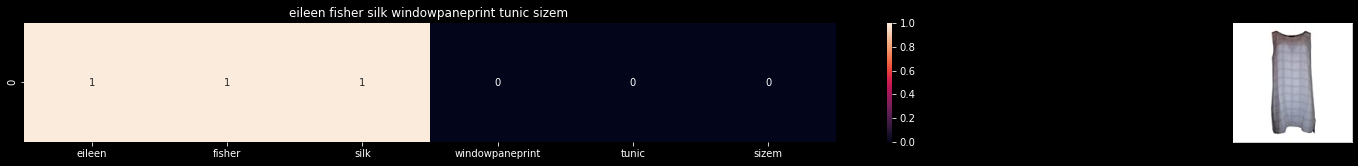

ASIN : B01MQK6FKI
TITLE : eileen fisher silk windowpaneprint tunic sizem 
BRAND : Eileen Fisher
Similarity Index(Euclidian Similarity) : 3.3166247903554
______________________________________________________________________


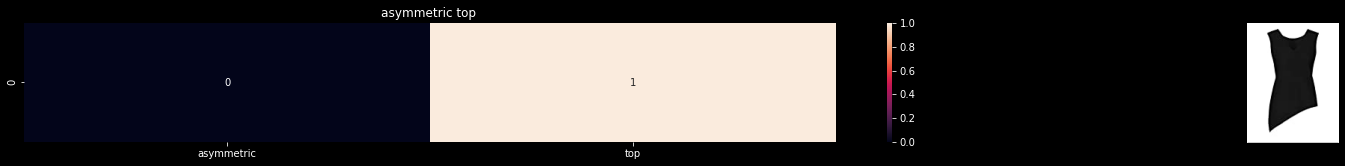

ASIN : B073XXTLJR
TITLE : asymmetric top 
BRAND : Wolford
Similarity Index(Euclidian Similarity) : 3.3166247903554
______________________________________________________________________


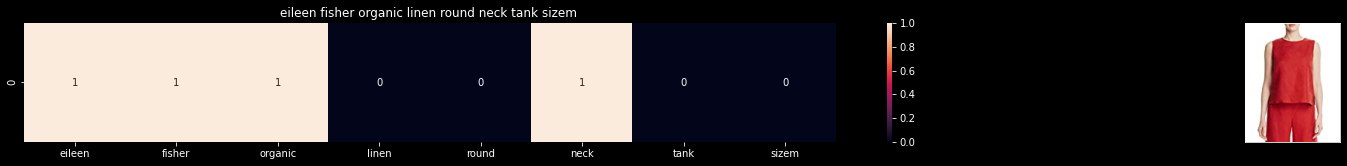

ASIN : B074TQZWRB
TITLE : eileen fisher organic linen round neck tank sizem 
BRAND : Eileen Fisher
Similarity Index(Euclidian Similarity) : 3.3166247903554
______________________________________________________________________


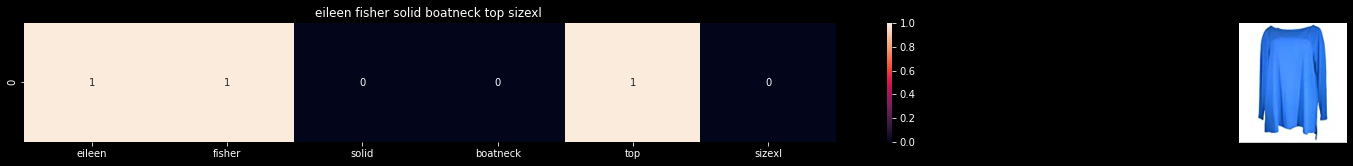

ASIN : B07175QZVB
TITLE : eileen fisher solid boatneck top sizexl 
BRAND : Eileen Fisher
Similarity Index(Euclidian Similarity) : 3.3166247903554
______________________________________________________________________


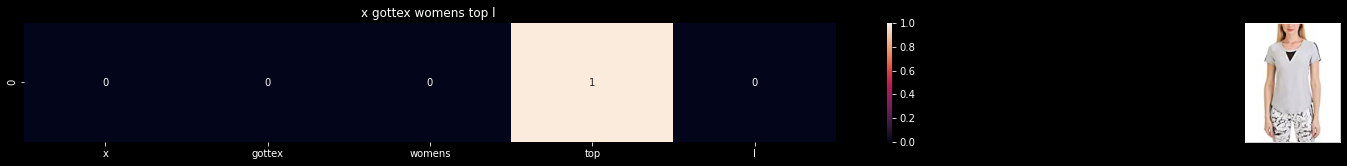

ASIN : B073M78XLP
TITLE : x gottex womens top l 
BRAND : X by Gottex
Similarity Index(Euclidian Similarity) : 3.4641016151377544
______________________________________________________________________


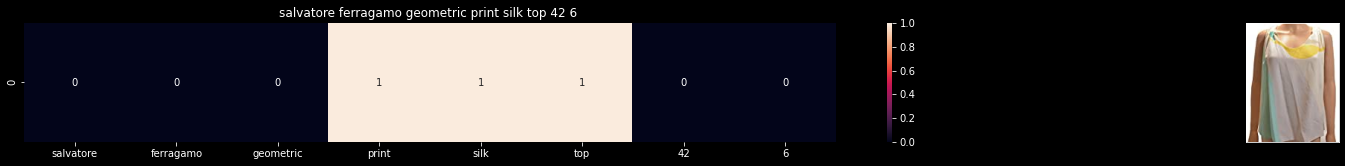

ASIN : B0756JTS1F
TITLE : salvatore ferragamo geometric print silk top 42 6 
BRAND : Salvatore Ferragamo
Similarity Index(Euclidian Similarity) : 3.4641016151377544
______________________________________________________________________


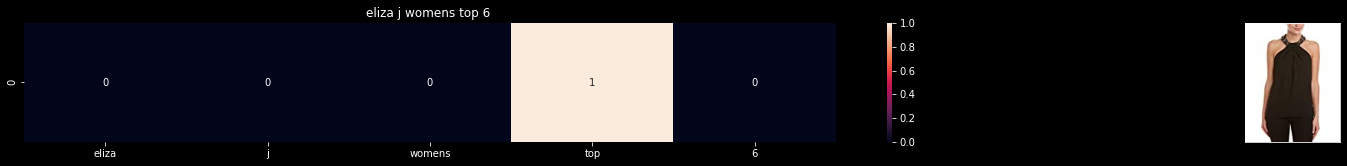

ASIN : B01M9FEO82
TITLE : eliza j womens top 6 
BRAND : Eliza J
Similarity Index(Euclidian Similarity) : 3.4641016151377544
______________________________________________________________________


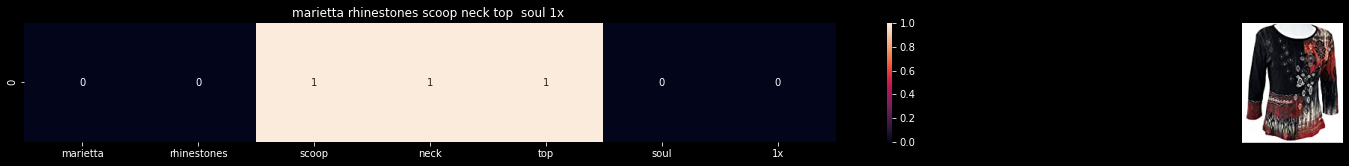

ASIN : B00FDVFHJA
TITLE : marietta rhinestones scoop neck top  soul 1x 
BRAND : Katina Marie
Similarity Index(Euclidian Similarity) : 3.4641016151377544
______________________________________________________________________


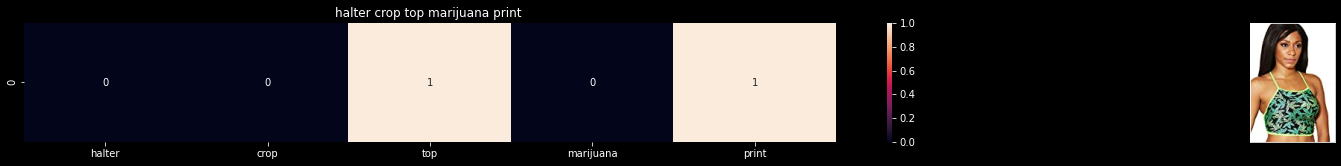

ASIN : B01MZDS691
TITLE : halter crop top marijuana print 
BRAND : Sassy Assy
Similarity Index(Euclidian Similarity) : 3.4641016151377544
______________________________________________________________________


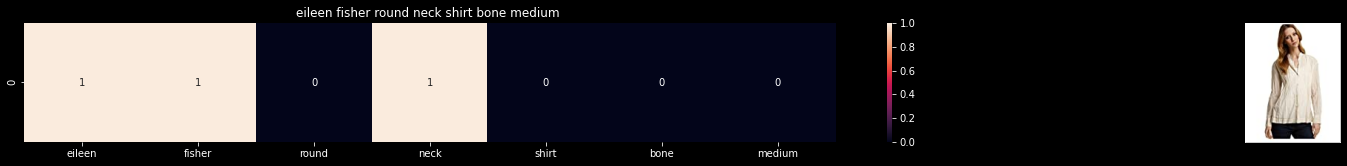

ASIN : B01N5VLQ1S
TITLE : eileen fisher round neck shirt bone medium 
BRAND : Eileen Fisher
Similarity Index(Euclidian Similarity) : 3.4641016151377544
______________________________________________________________________


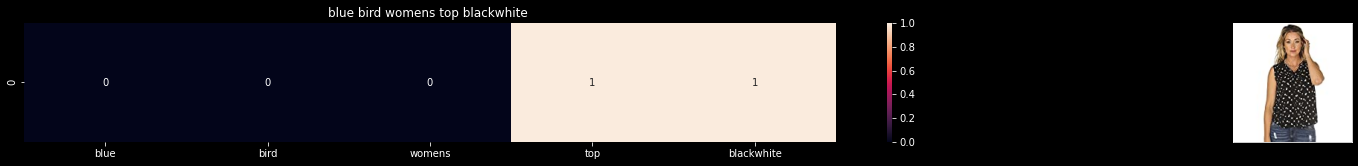

ASIN : B0711D8WMM
TITLE : blue bird womens top blackwhite 
BRAND : NRS
Similarity Index(Euclidian Similarity) : 3.4641016151377544
______________________________________________________________________


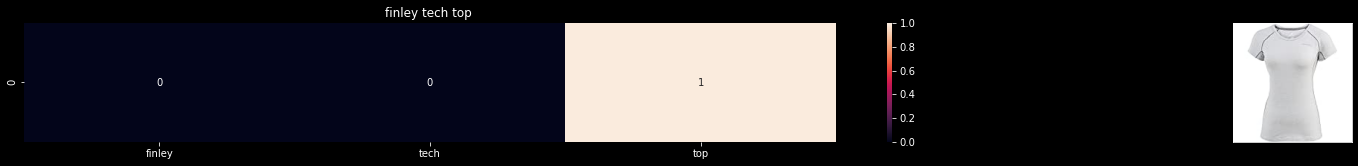

ASIN : B01MTEIDEB
TITLE : finley tech top 
BRAND : Merrell
Similarity Index(Euclidian Similarity) : 3.4641016151377544
______________________________________________________________________


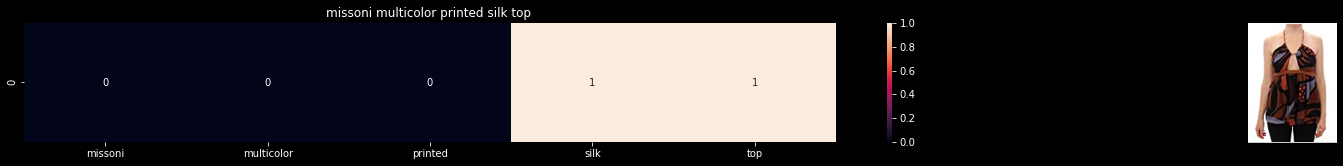

ASIN : B074G4T6GR
TITLE : missoni multicolor printed silk top 
BRAND : Missoni
Similarity Index(Euclidian Similarity) : 3.4641016151377544
______________________________________________________________________


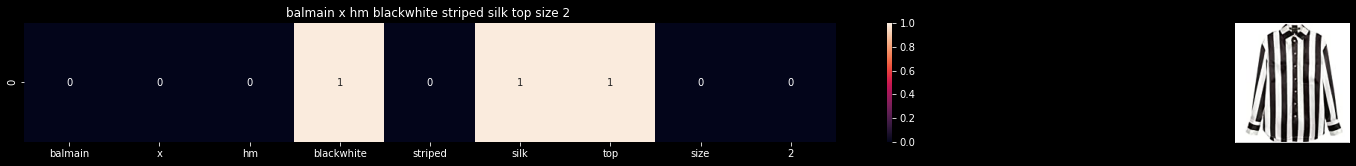

ASIN : B01J6UPUC2
TITLE : balmain x hm blackwhite striped silk top size 2 
BRAND : Balmain x H&m
Similarity Index(Euclidian Similarity) : 3.4641016151377544
______________________________________________________________________


In [10]:
BagOfWordsModel(data_set)

Enter the Apparel ID :
12300


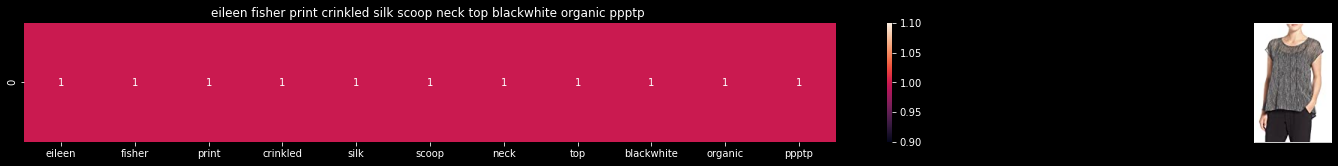

ASIN : B07562Y6M5
TITLE : eileen fisher print crinkled silk scoop neck top blackwhite organic ppptp 
BRAND : Eileen Fisher
Similarity Index(Euclidian Similarity) : 0.0
______________________________________________________________________


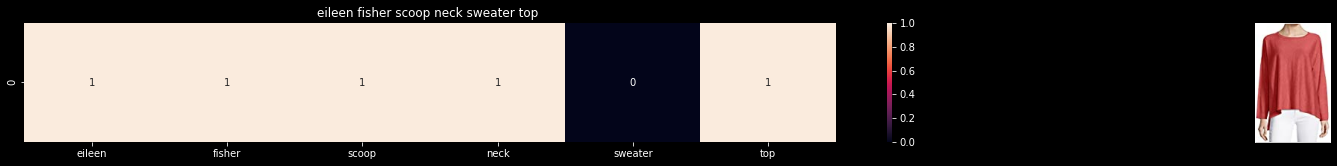

ASIN : B071PBRD93
TITLE : eileen fisher scoop neck sweater top 
BRAND : Eileen Fisher
Similarity Index(Euclidian Similarity) : 1.0032015934689227
______________________________________________________________________


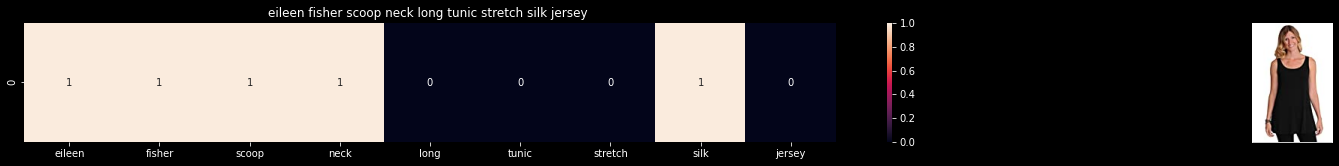

ASIN : B00W7UQLYK
TITLE : eileen fisher scoop neck long tunic stretch silk jersey 
BRAND : Eileen Fisher
Similarity Index(Euclidian Similarity) : 1.0309164610324382
______________________________________________________________________


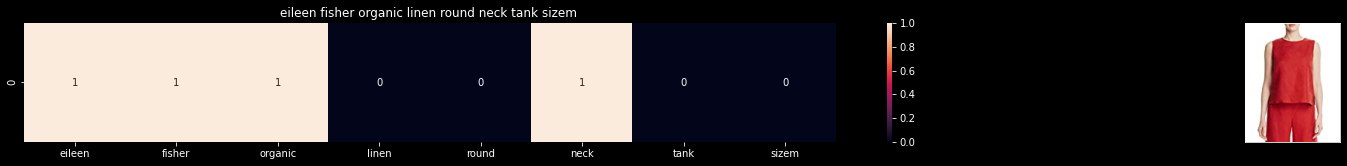

ASIN : B074TQZWRB
TITLE : eileen fisher organic linen round neck tank sizem 
BRAND : Eileen Fisher
Similarity Index(Euclidian Similarity) : 1.0665102528274664
______________________________________________________________________


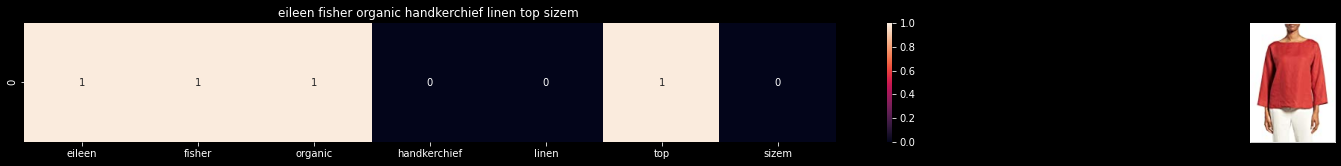

ASIN : B074TTWPHC
TITLE : eileen fisher organic handkerchief linen top sizem 
BRAND : Eileen Fisher
Similarity Index(Euclidian Similarity) : 1.0969667300290151
______________________________________________________________________


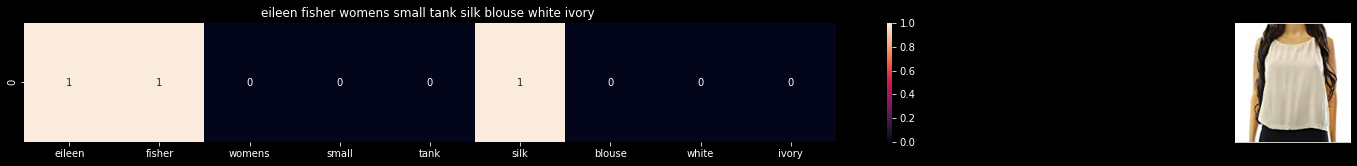

ASIN : B074P8TGVP
TITLE : eileen fisher womens small tank silk blouse white ivory 
BRAND : Eileen Fisher
Similarity Index(Euclidian Similarity) : 1.0976982431740834
______________________________________________________________________


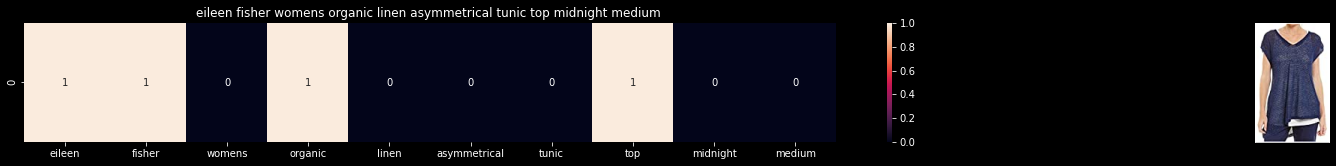

ASIN : B074PMCRYN
TITLE : eileen fisher womens organic linen asymmetrical tunic top midnight medium 
BRAND : Eileen Fisher
Similarity Index(Euclidian Similarity) : 1.1016919185817746
______________________________________________________________________


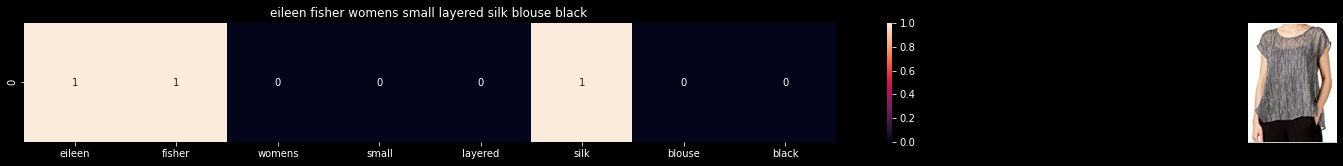

ASIN : B074ZS7QDQ
TITLE : eileen fisher womens small layered silk blouse black 
BRAND : Eileen Fisher
Similarity Index(Euclidian Similarity) : 1.1018848834574753
______________________________________________________________________


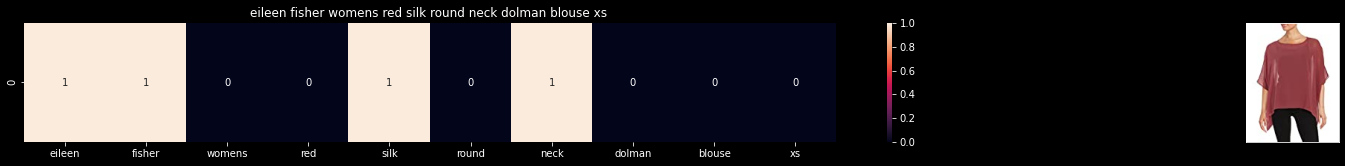

ASIN : B06Y3CKDML
TITLE : eileen fisher womens red silk round neck dolman blouse xs 
BRAND : Eileen Fisher
Similarity Index(Euclidian Similarity) : 1.1069914637790828
______________________________________________________________________


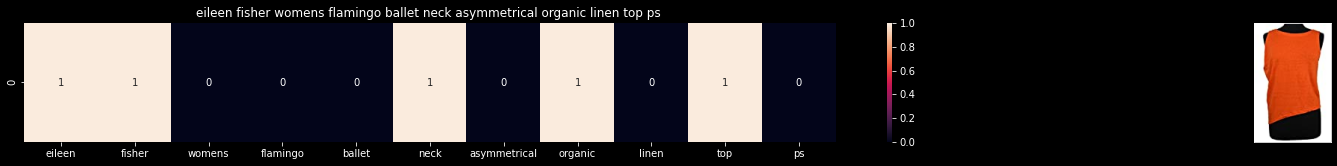

ASIN : B00YSZKZNA
TITLE : eileen fisher womens flamingo ballet neck asymmetrical organic linen top ps 
BRAND : Eileen Fisher
Similarity Index(Euclidian Similarity) : 1.115427420455605
______________________________________________________________________


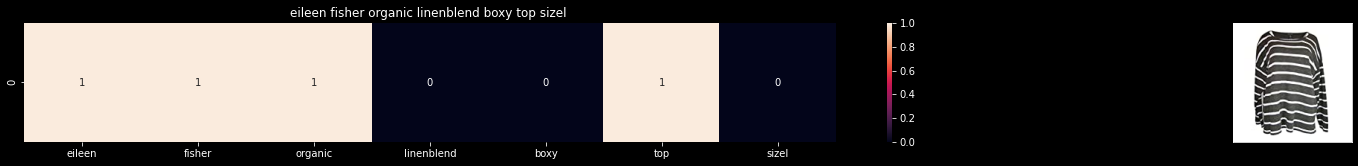

ASIN : B072FQ3PPB
TITLE : eileen fisher organic linenblend boxy top sizel 
BRAND : Eileen Fisher
Similarity Index(Euclidian Similarity) : 1.126948150608614
______________________________________________________________________


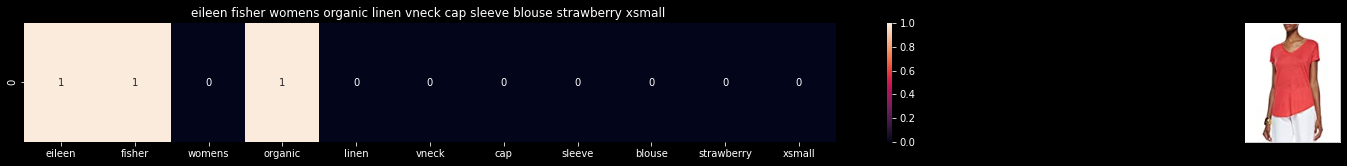

ASIN : B01KB6TZ1C
TITLE : eileen fisher womens organic linen vneck cap sleeve blouse strawberry xsmall 
BRAND : Eileen Fisher
Similarity Index(Euclidian Similarity) : 1.1276165578854023
______________________________________________________________________


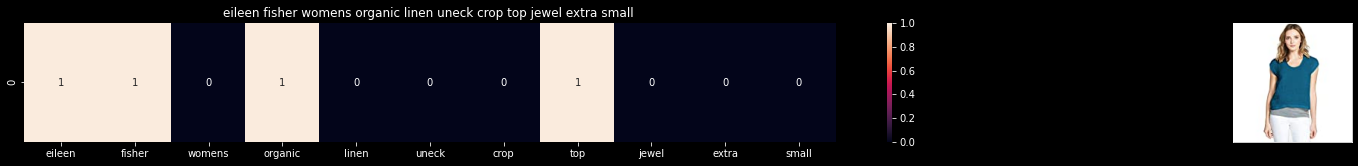

ASIN : B01MY4UMX6
TITLE : eileen fisher womens organic linen uneck crop top jewel extra small 
BRAND : Eileen Fisher
Similarity Index(Euclidian Similarity) : 1.1305076517156516
______________________________________________________________________


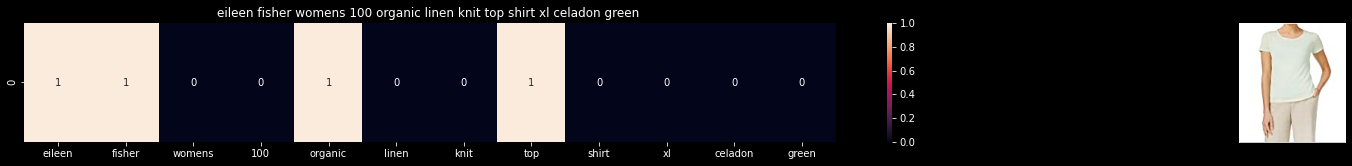

ASIN : B074QW3F51
TITLE : eileen fisher womens 100 organic linen knit top shirt xl celadon green 
BRAND : Eileen Fisher
Similarity Index(Euclidian Similarity) : 1.1317969869337643
______________________________________________________________________


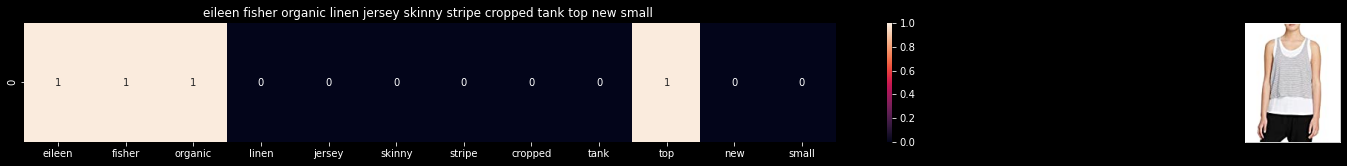

ASIN : B01KGQM0BE
TITLE : eileen fisher organic linen jersey skinny stripe cropped tank top new small 
BRAND : Eileen Fisher
Similarity Index(Euclidian Similarity) : 1.1355007737486984
______________________________________________________________________


In [11]:
TFIDFModel(data_set)